In [9]:
import gym
import matplotlib.pyplot as plt

from src.Agent import PPOAgent

# THE GAME: https://www.gymlibrary.dev/environments/classic_control/cart_pole/#rewards
env = gym.make('CartPole-v1')

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

gamma = 0.99
lmbda = 0.925
epsilon = 0.2  
policy_lr = 0.0005
value_lr = 0.0005
num_policy_epochs = 4
num_value_epochs = 4
smoothing_const = 1e-8
normalize_advantages = True

Agent = PPOAgent(env=env,
                 state_space_size=input_dim,
                 action_space_size=output_dim,
                 gamma=gamma,
                 lmbda=lmbda,
                 epsilon=epsilon,
                 smooting_const=smoothing_const,
                 normalize_advantages=normalize_advantages)

num_episodes = 150
accumulated_reward = Agent.train(episodes=num_episodes,
                                 policy_lr=policy_lr,
                                 value_lr=value_lr,
                                 num_policy_epochs=num_policy_epochs,
                                 num_value_epochs=num_value_epochs)

100%|██████████| 150/150 [00:19<00:00,  7.88it/s]


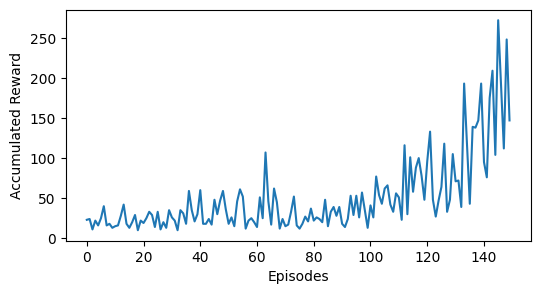

In [11]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot([e for e in range(num_episodes)], accumulated_reward)
ax.set_xlabel('Episodes')
ax.set_ylabel('Accumulated Reward')
plt.show()